In [8]:
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import numpy as np

import os

In [9]:
def read_until_string(filename, stop_string="~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"):
    with open(filename, 'r') as file:
        text = file.read()
    
    # Extract text until the stop_string
    if stop_string in text:
        text = text.split(stop_string)[0]
    return text

def plot_histogram(text, file_name):
    # Remove spaces and newline characters, keep all other characters
    filtered_text = ''.join(c for c in text if c != ' ' and c != '\n')
    
    # Count the occurrences of each character
    counter = Counter(filtered_text)
    
    # Get all character frequencies in a consistent order
    all_chars = sorted(counter.keys())
    frequencies = [counter[char] for char in all_chars]
    
    # Get the 10 most common characters for plotting
    most_common = counter.most_common(10)
    print(most_common)
    plot_chars, plot_freqs = zip(*most_common)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(plot_chars, plot_freqs, color='skyblue')
    plt.xlabel('Character')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Characters in {file_name}')
    plt.show()
    
    # Return the complete frequency data
    return dict(zip(all_chars, frequencies))

def process_files_from_array(file_paths, stop_string="~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"):
    # Store histogram data for each file
    histogram_data = []
    # Keep track of all unique characters across all files
    all_chars = set()
    
    # First pass: collect all unique characters and histogram data
    for file_path in file_paths:
        print(f"Processing {file_path}...")
        text = read_until_string(file_path, stop_string)
        hist = plot_histogram(text, file_path)
        histogram_data.append(hist)
        all_chars.update(hist.keys())
    
    # Convert to a format suitable for ANOVA
    all_chars = sorted(all_chars)
    processed_histograms = []
    
    # Second pass: ensure each histogram has all characters (with 0 for missing ones)
    for hist in histogram_data:
        frequencies = [hist.get(char, 0) for char in all_chars]
        processed_histograms.append(frequencies)
    
    return processed_histograms, all_chars


Processing examples\21\aiss.txt...
[('"', 176), (';', 104), ('~', 87), ('-', 85), ('>', 52), ('L', 39), ('q', 39), ('<', 38), ('*', 36), ('+', 34)]


<string>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:3: SyntaxWarning: invalid escape sequence '\{'
<string>:4: SyntaxWarning: invalid escape sequence '\{'
<string>:4: SyntaxWarning: invalid escape sequence '\{'
<string>:4: SyntaxWarning: invalid escape sequence '\{'
<string>:5: SyntaxWarning: invalid escape sequence '\{'
<string>:5: SyntaxWarning: invalid escape sequence '\{'
<string>:5: SyntaxWarning: invalid escape sequence '\{'
<string>:6: SyntaxWarning: invalid escape sequence '\{'
<string>:6: SyntaxWarning: invalid escape sequence '\{'
<string>:6: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\k'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escap

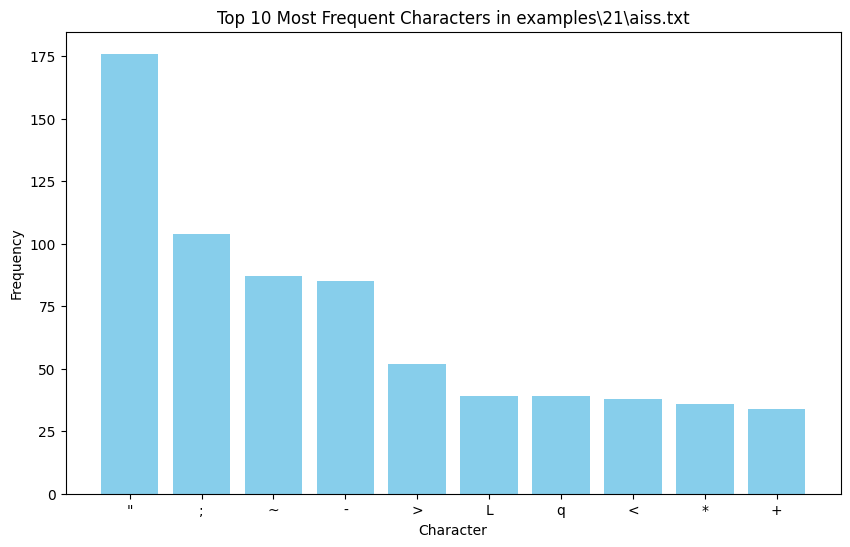

Processing examples\21\nn.txt...
[('-', 725), ('^', 245), ('w', 239), ('\\', 111), (',', 109), ('`', 91), ('[', 84), ('=', 76), ('m', 63), ('F', 59)]


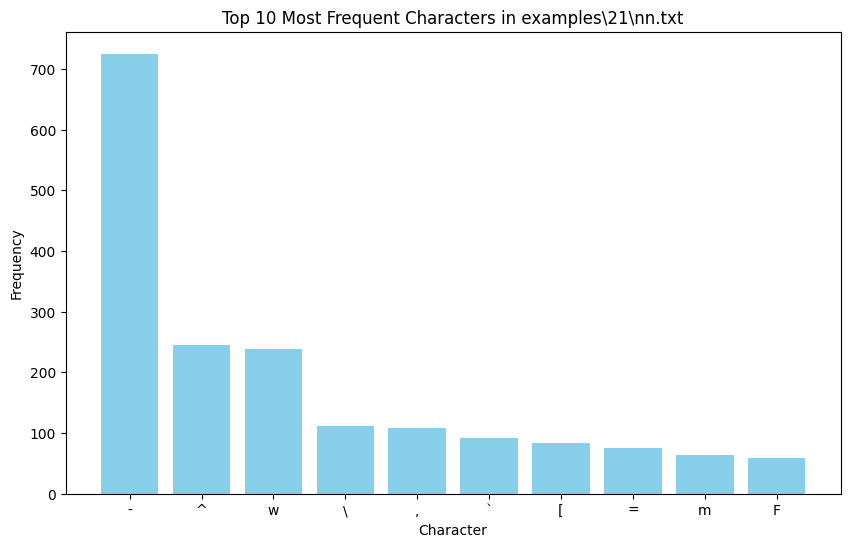

Processing examples\21\knn.txt...
[('-', 381), ('.', 310), (',', 195), ('|', 179), ("'", 147), ('^', 92), (':', 59), ('`', 59), (']', 53), ('[', 48)]


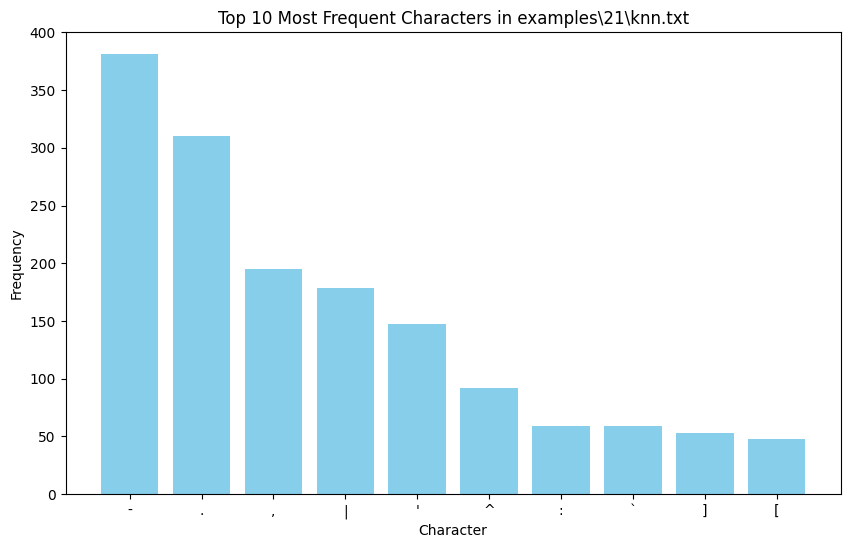

Processing examples\21\svm.txt...
[('-', 324), ('.', 170), (',', 166), ('^', 128), ('[', 112), ('r', 111), (']', 106), ("'", 104), ('`', 90), ('x', 83)]


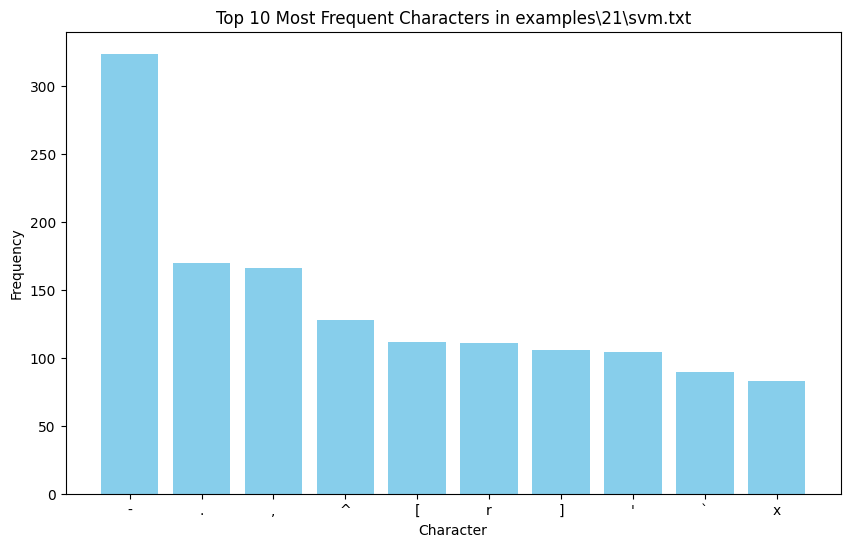

Processing examples\21\rforest.txt...
[('.', 325), ('-', 307), (',', 256), ('|', 195), ("'", 192), ('`', 190), ('^', 98), ('~', 83), ('\\', 79), ('/', 75)]


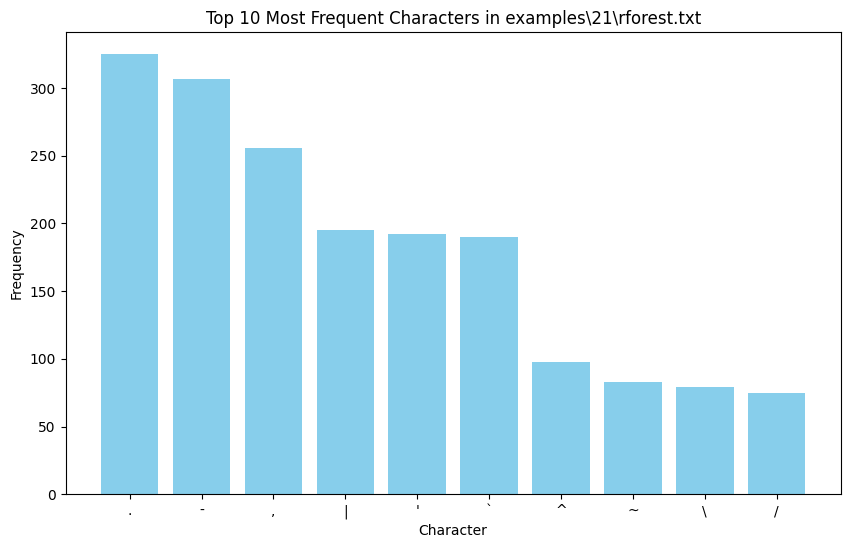

Processing examples\21\knn_no_hog.txt...
[('-', 339), (',', 248), ('.', 179), ("'", 134), ('~', 123), ('`', 95), ('[', 85), ('^', 79), ('/', 73), ('\\', 70)]


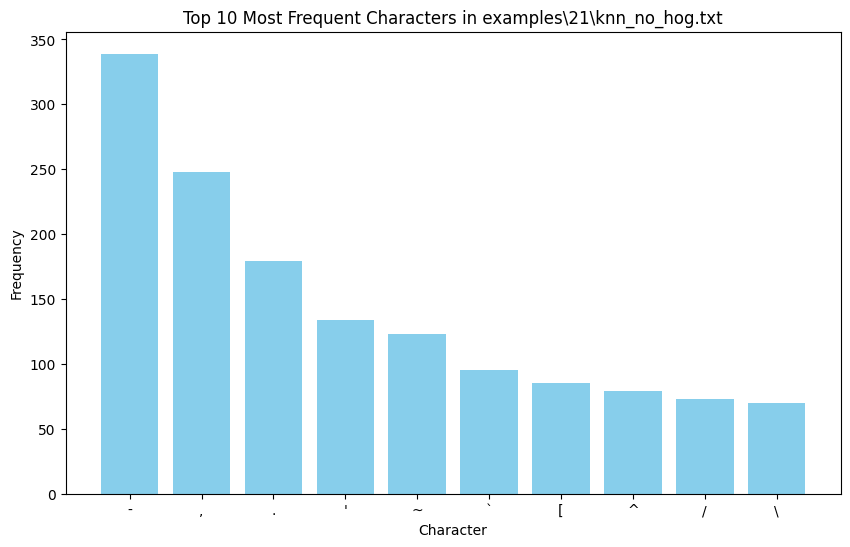

Processing examples\21\svm_no_hog.txt...
[('^', 245), (';', 176), ('/', 144), ('+', 136), ('*', 90), (',', 80), ('\\', 74), ('`', 69), ('?', 67), ('Y', 54)]


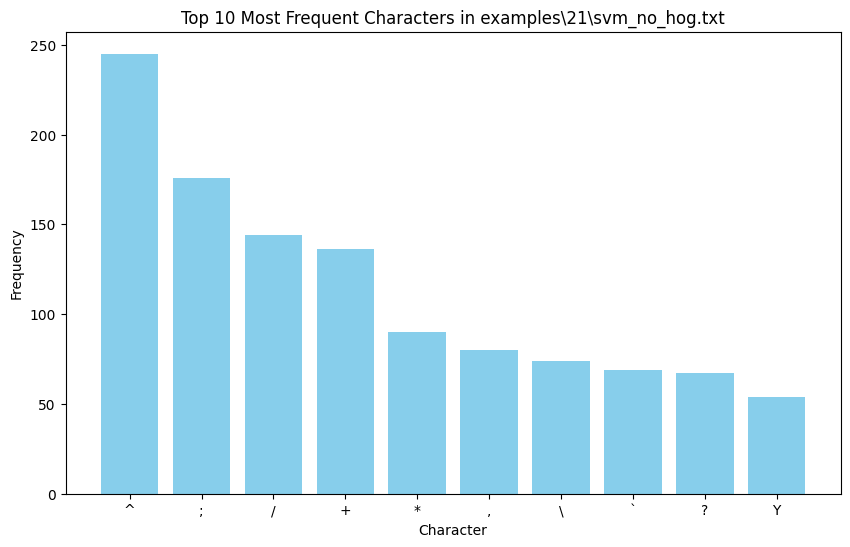

Processing examples\21\rforest_no_hog.txt...
[(',', 311), ('-', 287), ('.', 238), ('`', 226), ("'", 193), ('/', 154), ('\\', 122), ('~', 90), ('[', 72), ('^', 54)]


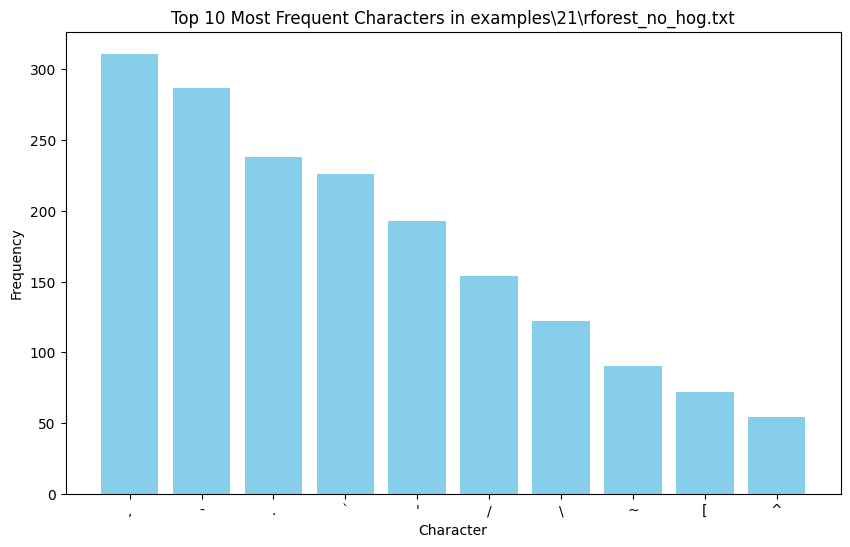

Processing examples\21\cnn.txt...
[('-', 506), ('\\', 136), ('.', 118), (',', 110), ('[', 95), ('/', 76), ("'", 74), ('{', 73), ('`', 70), (']', 66)]


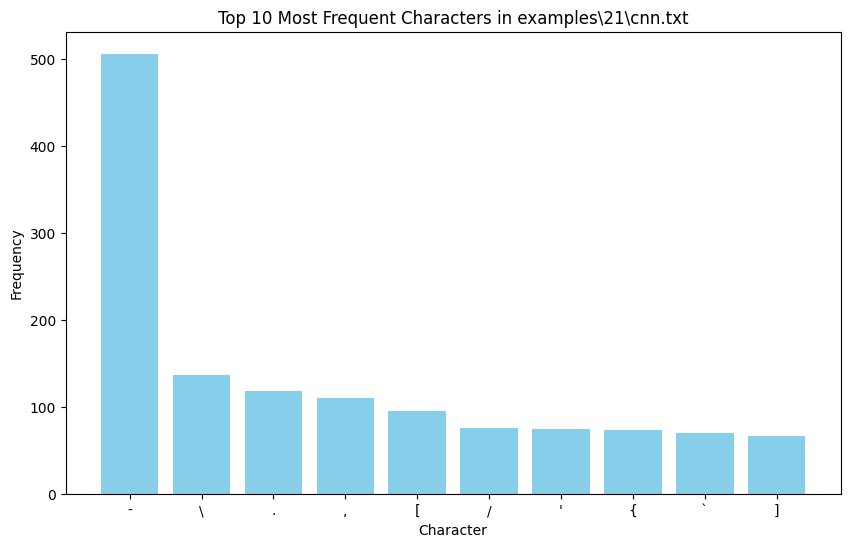

Processing examples\21\resnet.txt...
[('-', 293), (']', 130), (',', 108), ('\\', 107), ('~', 102), ('[', 91), ('@', 88), ('?', 82), ('`', 77), ('7', 76)]


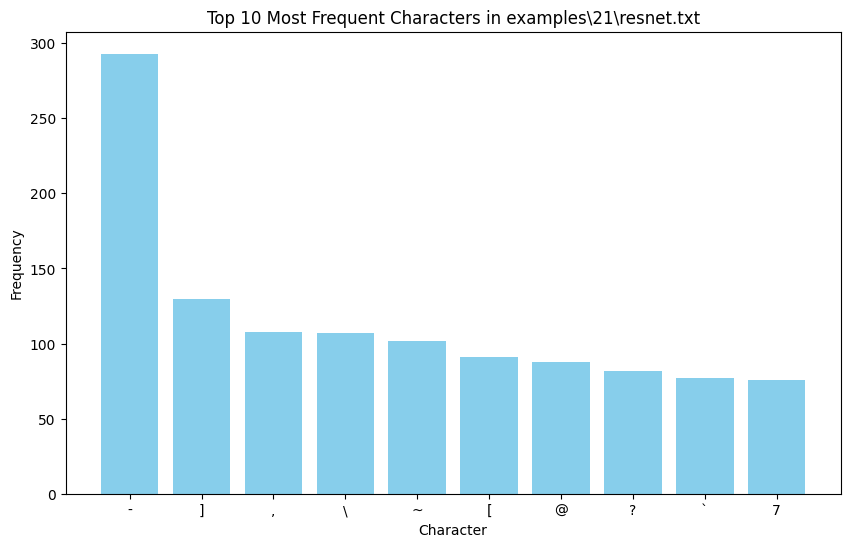

Processing examples\21\mobile.txt...
[('.', 155), (',', 146), ('-', 143), ("'", 124), ('^', 116), ('?', 108), ('~', 106), ('/', 104), (';', 90), ('>', 86)]


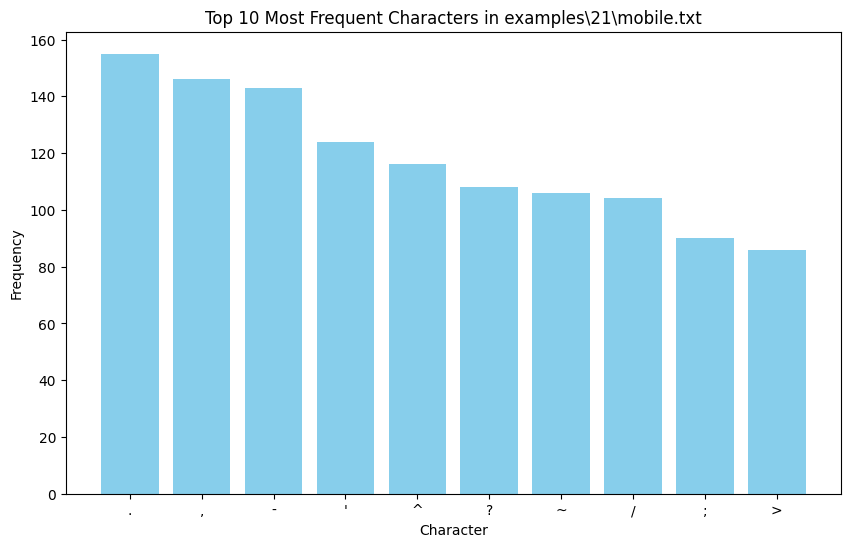

In [10]:
img_num = 21

image_filenames = [f'examples\{img_num}\\aiss.txt', f'examples\{img_num}\\nn.txt',
    f'examples\{img_num}\knn.txt', f'examples\{img_num}\svm.txt', f'examples\{img_num}\\rforest.txt', 
    f'examples\{img_num}\knn_no_hog.txt', f'examples\{img_num}\svm_no_hog.txt', f'examples\{img_num}\\rforest_no_hog.txt', 
     f'examples\{img_num}\cnn.txt', f'examples\{img_num}\\resnet.txt', f'examples\{img_num}\mobile.txt', 
           
     ] 

histograms, chars = process_files_from_array(image_filenames)

In [ ]:
import csv

In [16]:
# Initialize a dictionary to store column sums and counts
column_sums = {}
column_counts = {}

# Open and read the CSV file
with open("i2v_scores.csv", "r") as file:
    reader = csv.reader(file)
    headers = next(reader)  # Read the header row

    # Initialize the sums and counts for each column (excluding "Image Number")
    for header in headers[1:]:
        column_sums[header] = 0
        column_counts[header] = 0

    # Iterate through each row in the CSV
    for row in reader:
        for i, value in enumerate(row[1:], start=1):  # Skip the "Image Number" column
            column_sums[headers[i]] += float(value)
            column_counts[headers[i]] += 1

print("Column Sums:", column_sums)
print("Column Counts:", column_counts)
# Compute the averages for each column using a normal for loop
column_averages = {}
for header in headers[1:]:
    column_averages[header] = column_sums[header] / column_counts[header]

# Print the column sums, counts, and averages

print("Column Averages:")
for column, avg in column_averages.items():
    print(f"{column}: {avg*100:.6f}")


Column Sums: {'AISS': 13.559981729999999, 'Neural Network': 14.361856869999999, 'k-NN': 14.821891940000002, 'SVM': 15.02840188, 'Random Forest': 15.38453114, 'k-NN no HOG': 15.251985160000002, 'SVM no HOG': 14.684153310000001, 'Random Forest no HOG': 15.477750830000002, 'CNN': 15.391639660000001, 'ResNet': 14.72326584, 'MobileNetV2': 14.44883843}
Column Counts: {'AISS': 20, 'Neural Network': 20, 'k-NN': 20, 'SVM': 20, 'Random Forest': 20, 'k-NN no HOG': 20, 'SVM no HOG': 20, 'Random Forest no HOG': 20, 'CNN': 20, 'ResNet': 20, 'MobileNetV2': 20}
Column Averages:
AISS: 67.799909
Neural Network: 71.809284
k-NN: 74.109460
SVM: 75.142009
Random Forest: 76.922656
k-NN no HOG: 76.259926
SVM no HOG: 73.420767
Random Forest no HOG: 77.388754
CNN: 76.958198
ResNet: 73.616329
MobileNetV2: 72.244192


In [17]:
# Initialize a dictionary to store column sums and counts
column_sums = {}
column_counts = {}

# Open and read the CSV file
with open("ssim_scores.csv", "r") as file:
    reader = csv.reader(file)
    headers = next(reader)  # Read the header row

    # Initialize the sums and counts for each column (excluding "Image Number")
    for header in headers[1:]:
        column_sums[header] = 0
        column_counts[header] = 0

    # Iterate through each row in the CSV
    for row in reader:
        for i, value in enumerate(row[1:], start=1):  # Skip the "Image Number" column
            column_sums[headers[i]] += float(value)
            column_counts[headers[i]] += 1

print("Column Sums:", column_sums)
print("Column Counts:", column_counts)
# Compute the averages for each column using a normal for loop
column_averages = {}
for header in headers[1:]:
    column_averages[header] = column_sums[header] / column_counts[header]

# Print the column sums, counts, and averages

print("Column Averages:")
for column, avg in column_averages.items():
    print(f"{column}: {avg:.6f}")


Column Sums: {'AISS': 13.406273782950796, 'Neural Network': 12.69960661309503, 'k-NN': 13.312294420956006, 'SVM': 12.94587292596177, 'Random Forest': 13.127519579963025, 'k-NN no HOG': 13.228547462356392, 'SVM no HOG': 12.955906234653982, 'Random Forest no HOG': 13.34737660016114, 'CNN': 13.29423144401833, 'ResNet': 12.730779578814829, 'MobileNetV2': 12.69811901226026}
Column Counts: {'AISS': 20, 'Neural Network': 20, 'k-NN': 20, 'SVM': 20, 'Random Forest': 20, 'k-NN no HOG': 20, 'SVM no HOG': 20, 'Random Forest no HOG': 20, 'CNN': 20, 'ResNet': 20, 'MobileNetV2': 20}
Column Averages:
AISS: 0.670314
Neural Network: 0.634980
k-NN: 0.665615
SVM: 0.647294
Random Forest: 0.656376
k-NN no HOG: 0.661427
SVM no HOG: 0.647795
Random Forest no HOG: 0.667369
CNN: 0.664712
ResNet: 0.636539
MobileNetV2: 0.634906
